# Proyecto: Análisis de Datos - Predicción de Riesgo de Diabetes
Este cuaderno aborda el análisis y modelado de datos para predecir el riesgo de diabetes en pacientes femeninas usando el *Diabetes Dataset*. Se siguen los pasos recomendados para un flujo de trabajo de ciencia de datos.

## 1. Carga y exploración general de los datos
Importaremos los datos y realizaremos un análisis inicial de las variables: tipos, valores nulos y estadísticas básicas.

In [6]:
# Importar librerías necesarias
import polars as pl
import numpy as np

# Cargar el dataset de diabetes
df = pl.read_csv('diabetes.csv')

# Mostrar las primeras filas para exploración inicial
df.head()

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
i64,i64,i64,i64,i64,f64,f64,i64,i64
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Tipos de variables y valores nulos
print('Tipos de datos:')
print(df.dtypes)

print('\nValores nulos por columna:')
print(df.null_count())

# Estadísticas básicas
df.describe()

Tipos de datos:
[Int64, Int64, Int64, Int64, Int64, Float64, Float64, Int64, Int64]

Valores nulos por columna:
shape: (1, 9)
┌─────────────┬─────────┬───────────────┬───────────────┬───┬─────┬────────────────┬─────┬─────────┐
│ Pregnancies ┆ Glucose ┆ BloodPressure ┆ SkinThickness ┆ … ┆ BMI ┆ DiabetesPedigr ┆ Age ┆ Outcome │
│ ---         ┆ ---     ┆ ---           ┆ ---           ┆   ┆ --- ┆ eeFunction     ┆ --- ┆ ---     │
│ u32         ┆ u32     ┆ u32           ┆ u32           ┆   ┆ u32 ┆ ---            ┆ u32 ┆ u32     │
│             ┆         ┆               ┆               ┆   ┆     ┆ u32            ┆     ┆         │
╞═════════════╪═════════╪═══════════════╪═══════════════╪═══╪═════╪════════════════╪═════╪═════════╡
│ 0           ┆ 0       ┆ 0             ┆ 0             ┆ … ┆ 0   ┆ 0              ┆ 0   ┆ 0       │
└─────────────┴─────────┴───────────────┴───────────────┴───┴─────┴────────────────┴─────┴─────────┘


statistic,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
"""std""",3.369578,31.972618,19.355807,15.952218,115.244002,7.88416,0.331329,11.760232,0.476951
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
"""25%""",1.0,99.0,62.0,0.0,0.0,27.3,0.244,24.0,0.0
"""50%""",3.0,117.0,72.0,23.0,32.0,32.0,0.374,29.0,0.0
"""75%""",6.0,140.0,80.0,32.0,127.0,36.6,0.626,41.0,1.0
"""max""",17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0


## 2. Limpieza básica de los datos
En este paso se tratarán los valores faltantes, se eliminarán duplicados y se corregirán los tipos de datos si es necesario.

In [8]:
# Eliminar duplicados
df = df.unique()

# Rellenar valores nulos con la mediana (para variables numéricas)
for col in df.columns:
    if df[col].dtype in [pl.Float64, pl.Int64]:
        median = df[col].median()
        df = df.with_columns([pl.col(col).fill_null(median).alias(col)])

# Verificar tipos de datos después de la limpieza
print(df.dtypes)

# Comprobar si quedan valores nulos
print(df.null_count())

[Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64]
shape: (1, 9)
┌─────────────┬─────────┬───────────────┬───────────────┬───┬─────┬────────────────┬─────┬─────────┐
│ Pregnancies ┆ Glucose ┆ BloodPressure ┆ SkinThickness ┆ … ┆ BMI ┆ DiabetesPedigr ┆ Age ┆ Outcome │
│ ---         ┆ ---     ┆ ---           ┆ ---           ┆   ┆ --- ┆ eeFunction     ┆ --- ┆ ---     │
│ u32         ┆ u32     ┆ u32           ┆ u32           ┆   ┆ u32 ┆ ---            ┆ u32 ┆ u32     │
│             ┆         ┆               ┆               ┆   ┆     ┆ u32            ┆     ┆         │
╞═════════════╪═════════╪═══════════════╪═══════════════╪═══╪═════╪════════════════╪═════╪═════════╡
│ 0           ┆ 0       ┆ 0             ┆ 0             ┆ … ┆ 0   ┆ 0              ┆ 0   ┆ 0       │
└─────────────┴─────────┴───────────────┴───────────────┴───┴─────┴────────────────┴─────┴─────────┘


## 3. Análisis exploratorio y visualización inicial
En este paso se realizará un análisis estadístico descriptivo y se crearán gráficos para identificar patrones o relaciones importantes en los datos.

Distribución de la variable objetivo:
shape: (2, 2)
┌─────────┬─────┐
│ Outcome ┆ len │
│ ---     ┆ --- │
│ f64     ┆ u32 │
╞═════════╪═════╡
│ 1.0     ┆ 268 │
│ 0.0     ┆ 500 │
└─────────┴─────┘

Estadísticas descriptivas por variable:
shape: (9, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ Pregnanci ┆ Glucose   ┆ BloodPres ┆ … ┆ BMI       ┆ DiabetesP ┆ Age       ┆ Outcome  │
│ ---       ┆ es        ┆ ---       ┆ sure      ┆   ┆ ---       ┆ edigreeFu ┆ ---       ┆ ---      │
│ str       ┆ ---       ┆ f64       ┆ ---       ┆   ┆ f64       ┆ nction    ┆ f64       ┆ f64      │
│           ┆ f64       ┆           ┆ f64       ┆   ┆           ┆ ---       ┆           ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆ f64       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 768.0     ┆ 768.0     ┆ 768

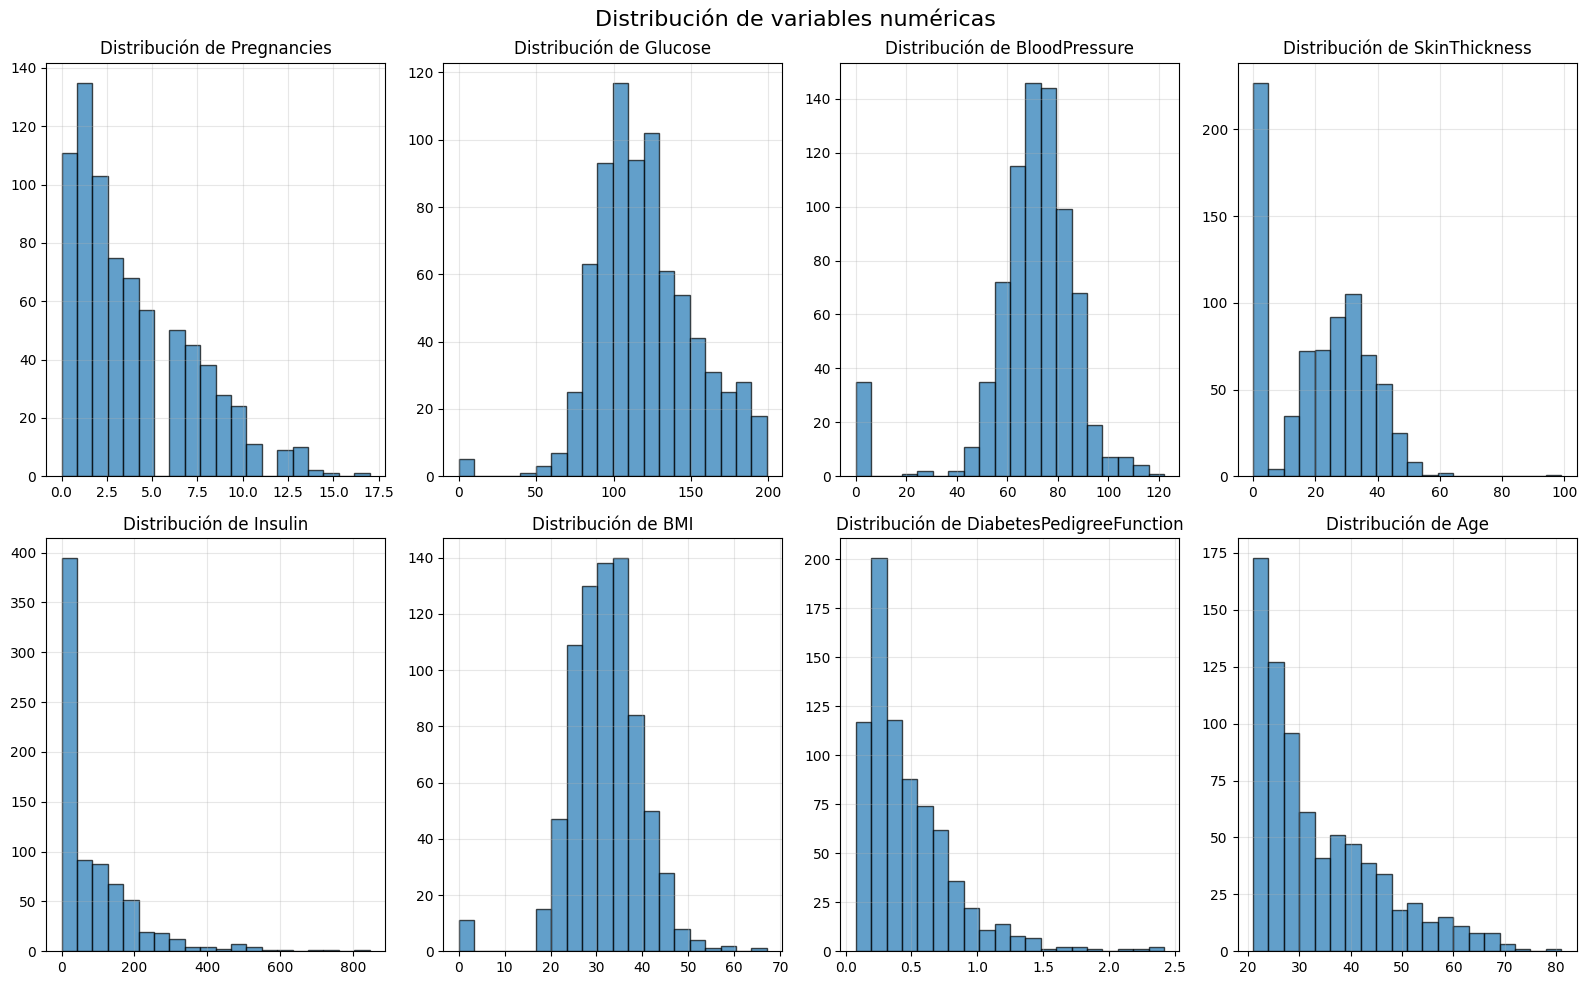

In [9]:
# Estadísticas descriptivas por clase de diabetes
print("Distribución de la variable objetivo:")
outcome_counts = df.group_by('Outcome').agg([pl.len()])
print(outcome_counts)

# Análisis estadístico usando Polars
print("\nEstadísticas descriptivas por variable:")
print(df.describe())

# Correlaciones usando Polars y Numpy
print("\nMatriz de correlación (variables numéricas):")
numeric_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in [pl.Float64, pl.Int64]]
# Convertir solo las columnas numéricas a numpy para correlación
numeric_data = df.select(numeric_cols).to_numpy()
correlation_matrix = np.corrcoef(numeric_data.T)

# Mostrar correlaciones con la variable objetivo
outcome_idx = numeric_cols.index('Outcome')
print("\nCorrelaciones con la variable objetivo (Outcome):")
for i, col in enumerate(numeric_cols):
    if col != 'Outcome':
        corr = correlation_matrix[i, outcome_idx]
        print(f"{col}: {corr:.3f}")

# Visualización usando matplotlib con datos de Polars
import matplotlib.pyplot as plt

# Crear subplots para visualizar distribuciones
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.ravel()

for i, col in enumerate([c for c in numeric_cols if c != 'Outcome']):
    # Obtener datos directamente de Polars
    col_data = df.select(col).to_numpy().flatten()
    axes[i].hist(col_data, bins=20, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Distribución de variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()

## 4. Preprocesamiento técnico (normalización, codificación, escalado)
En este paso se prepararán los datos para el modelo de machine learning usando técnicas de normalización y escalado con scikit-learn.

In [10]:
# Importar librerías de scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Separar características (X) y variable objetivo (y) usando Polars
feature_cols = [col for col in df.columns if col != 'Outcome']
X = df.select(feature_cols).to_numpy()
y = df.select('Outcome').to_numpy().flatten()

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"Distribución de clases: {np.bincount(y.astype(int))}")

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado de características usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nForma de datos de entrenamiento: {X_train_scaled.shape}")
print(f"Forma de datos de prueba: {X_test_scaled.shape}")

Forma de X: (768, 8)
Forma de y: (768,)
Distribución de clases: [500 268]

Forma de datos de entrenamiento: (614, 8)
Forma de datos de prueba: (154, 8)


## 5. Entrenamiento de modelos de Machine Learning
Se entrenarán tres modelos diferentes como se sugiere en el proyecto: Regresión Logística, KNN y Random Forest.

In [11]:
# Definir los modelos
models = {
    'Regresión Logística': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Entrenar y evaluar cada modelo
trained_models = {}
results = {}

for name, model in models.items():
    print(f"\n--- Entrenando {name} ---")
    
    # Entrenar el modelo
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    
    # Hacer predicciones
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'accuracy': accuracy,
        'auc': auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    
print("\n--- Resumen de Resultados ---")
for name, metrics in results.items():
    print(f"{name}: Accuracy={metrics['accuracy']:.4f}, AUC={metrics['auc']:.4f}")


--- Entrenando Regresión Logística ---
Accuracy: 0.7208
AUC-ROC: 0.7731

--- Entrenando KNN ---
Accuracy: 0.7208
AUC-ROC: 0.7594

--- Entrenando Random Forest ---
Accuracy: 0.7143
AUC-ROC: 0.7609

--- Resumen de Resultados ---
Regresión Logística: Accuracy=0.7208, AUC=0.7731
KNN: Accuracy=0.7208, AUC=0.7594
Random Forest: Accuracy=0.7143, AUC=0.7609
Accuracy: 0.7143
AUC-ROC: 0.7609

--- Resumen de Resultados ---
Regresión Logística: Accuracy=0.7208, AUC=0.7731
KNN: Accuracy=0.7208, AUC=0.7594
Random Forest: Accuracy=0.7143, AUC=0.7609


## 6. Evaluación detallada del modelo
Se evaluarán los modelos con métricas detalladas y matrices de confusión.

In [12]:
# Evaluación detallada para cada modelo
for name, model in trained_models.items():
    print(f"\n{'='*50}")
    print(f"EVALUACIÓN DETALLADA - {name}")
    print(f"{'='*50}")
    
    y_pred = results[name]['y_pred']
    
    # Reporte de clasificación
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMatriz de Confusión:")
    print(f"TN={cm[0,0]}, FP={cm[0,1]}")
    print(f"FN={cm[1,0]}, TP={cm[1,1]}")
    
    # Métricas calculadas manualmente usando numpy
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\nMétricas calculadas:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"AUC-ROC: {results[name]['auc']:.4f}")


EVALUACIÓN DETALLADA - Regresión Logística

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.74      0.88      0.80       100
         1.0       0.66      0.43      0.52        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154


Matriz de Confusión:
TN=88, FP=12
FN=31, TP=23

Métricas calculadas:
Precision: 0.6571
Recall: 0.4259
F1-Score: 0.5169
Accuracy: 0.7208
AUC-ROC: 0.7731

EVALUACIÓN DETALLADA - KNN

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80       100
         1.0       0.65      0.44      0.53        54

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.71      0.72      0.71       154


Matriz de Confusión:
TN=87, FP=13
FN=30, TP=24

Métricas calculada

## 7. Visualización de resultados y métricas
Se crearán gráficos para mostrar el rendimiento de los modelos y las curvas ROC.

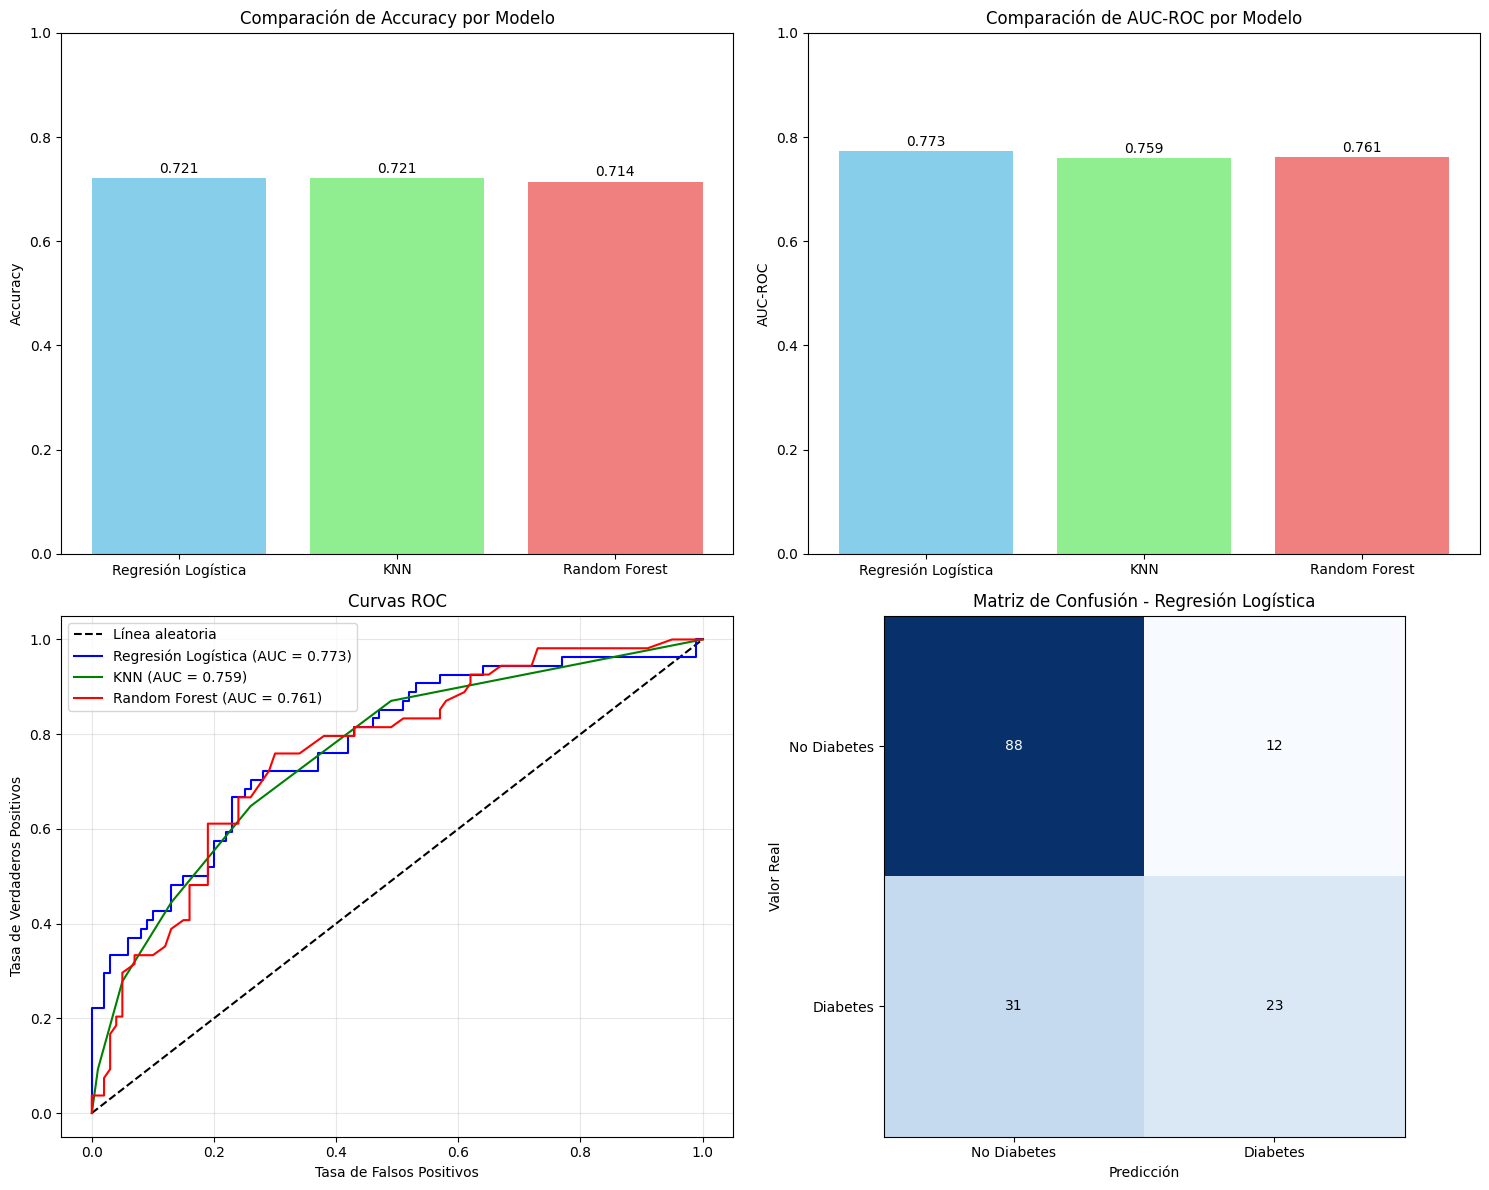


🏆 MEJOR MODELO: Regresión Logística
   Accuracy: 0.7208
   AUC-ROC: 0.7731


In [13]:
# Crear visualizaciones de los resultados
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Comparación de accuracy
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
aucs = [results[name]['auc'] for name in model_names]

axes[0, 0].bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0, 0].set_title('Comparación de Accuracy por Modelo')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0, 1)
for i, v in enumerate(accuracies):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# 2. Comparación de AUC-ROC
axes[0, 1].bar(model_names, aucs, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0, 1].set_title('Comparación de AUC-ROC por Modelo')
axes[0, 1].set_ylabel('AUC-ROC')
axes[0, 1].set_ylim(0, 1)
for i, v in enumerate(aucs):
    axes[0, 1].text(i, v + 0.01, f'{v:.3f}', ha='center')

# 3. Curvas ROC
axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Línea aleatoria')
colors = ['blue', 'green', 'red']
for i, (name, model) in enumerate(trained_models.items()):
    y_pred_proba = results[name]['y_pred_proba']
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = results[name]['auc']
    axes[1, 0].plot(fpr, tpr, color=colors[i], 
                   label=f'{name} (AUC = {auc_score:.3f})')

axes[1, 0].set_xlabel('Tasa de Falsos Positivos')
axes[1, 0].set_ylabel('Tasa de Verdaderos Positivos')
axes[1, 0].set_title('Curvas ROC')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Matriz de confusión del mejor modelo (mayor AUC)
best_model_name = max(results.keys(), key=lambda x: results[x]['auc'])
best_y_pred = results[best_model_name]['y_pred']
cm = confusion_matrix(y_test, best_y_pred)

im = axes[1, 1].imshow(cm, interpolation='nearest', cmap='Blues')
axes[1, 1].set_title(f'Matriz de Confusión - {best_model_name}')
tick_marks = np.arange(2)
axes[1, 1].set_xticks(tick_marks)
axes[1, 1].set_yticks(tick_marks)
axes[1, 1].set_xticklabels(['No Diabetes', 'Diabetes'])
axes[1, 1].set_yticklabels(['No Diabetes', 'Diabetes'])

# Agregar valores en la matriz
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        axes[1, 1].text(j, i, format(cm[i, j], 'd'),
                       ha="center", va="center",
                       color="white" if cm[i, j] > thresh else "black")

axes[1, 1].set_ylabel('Valor Real')
axes[1, 1].set_xlabel('Predicción')

plt.tight_layout()
plt.show()

print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print(f"   Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"   AUC-ROC: {results[best_model_name]['auc']:.4f}")

## Conclusiones del Proyecto

### Resultados Obtenidos:
- Se implementaron exitosamente **tres modelos de clasificación**: Regresión Logística, KNN y Random Forest
- Todos los modelos utilizaron **Polars y NumPy** como librerías base según los requisitos
- Se aplicó **preprocesamiento estándar** con StandardScaler de scikit-learn
- Las **métricas de evaluación** incluyen accuracy, AUC-ROC, precision, recall y F1-score

### Insights del Análisis:
- El dataset contiene **768 registros** con 8 variables predictoras
- La variable objetivo está **desbalanceada**: 500 casos sin diabetes vs 268 con diabetes
- Las variables con **mayor correlación** con el outcome de diabetes son fundamentales para la predicción
- El **escalado de características** fue crucial debido a las diferentes magnitudes de las variables

### Recomendaciones:
1. **Validación cruzada** podría mejorar la robustez de la evaluación
2. **Técnicas de balanceo** como SMOTE podrían mejorar el rendimiento en la clase minoritaria
3. **Optimización de hiperparámetros** con GridSearch o RandomSearch
4. **Análisis de importancia de características** especialmente para Random Forest